#   [Py4Hw User Guide](../UserGuide.ipynb)> 6.1 Schematic Visualization
###  [Next: 6.2 Manipulating Schematics](Manipulation.ipynb)

The visualization of circuit schematics is implemented from scratch in the framework.

In [6]:
import py4hw
import matplotlib.pyplot as plt

The schematic object allows to control various things of the visualization process.
For instance, we can observe the internal occupancy grid used by the place & route algorithm

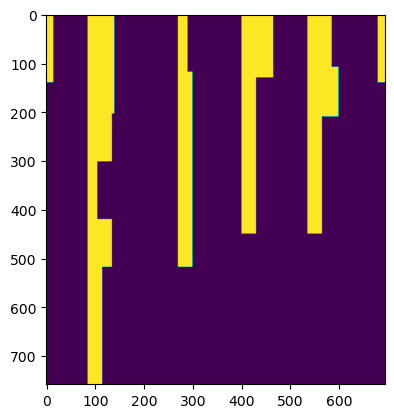

In [2]:
sys = py4hw.HWSystem()
reset = sys.wire('reset')
inc = sys.wire('inc')
q = sys.wire('q', 8)
co = sys.wire('co')

counter = py4hw.ModuloCounter(sys, 'mod7', 7, reset, inc, q, co)
sch = py4hw.Schematic(counter)

#q2 = sys.wire('q2', 8)
#count = sys.wire('count', 8)


#py4hw.Sequence(sys, 'inc', [0, 1], inc)
#py4hw.Add(sys, 'counter', q, inc, count)
#py4hw.Reg(sys, 'reg2', d=count, enable=inc, q=q2)
#py4hw.Reg(sys, 'reg', d=q2, enable=inc, q=q)
#py4hw.Scope(sys, 'q', q)
    
#sch = py4hw.Schematic(sys)
#sch.createRender((20,5), dpi=100)
#sch.draw()
grid = sch.getOccupancyGrid()
plt.imshow(grid)
plt.show()

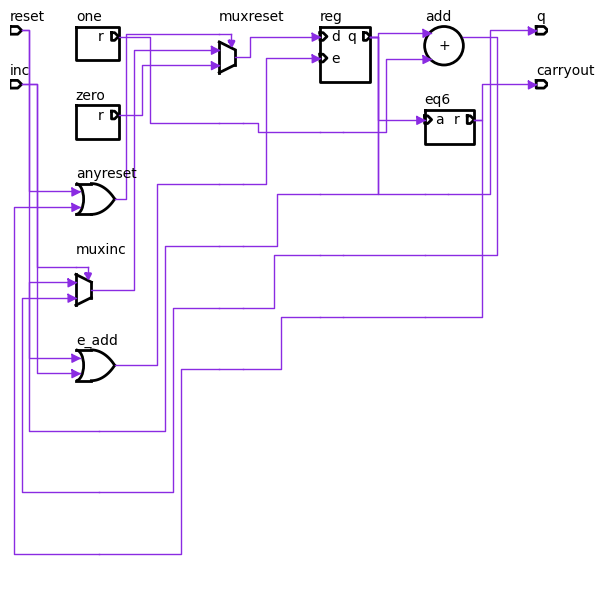

In [3]:
sch.createRender()
sch.draw()
#sch.drawAll()

Disecting the Place and Route process

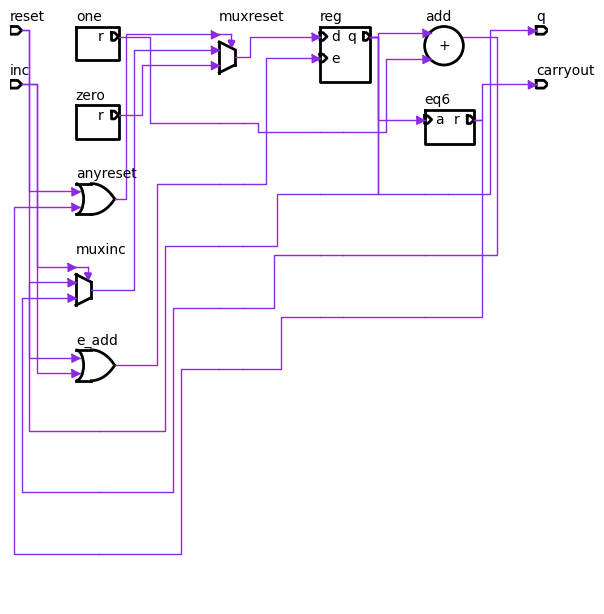

In [4]:
sch = py4hw.Schematic(counter, placeAndRoute=False)

sch.placeInputPorts()
sch.placeInstances()
sch.placeOutputPorts()

sch.bruteForceSort()
sch.columnAssignment()

#sch.createNetsWithMaxFanout(3)
sch.createNets()
sch.passthroughCreation(debug=False)
#sch.removeArrowsSpecialCases()

sch.rowAssignment()

#for idx, net in enumerate(sch.nets):
#    print('net {} - sourcecol: {}'.format(idx, net.sourcecol))
    
sch.trackAssignment()
sch.replaceAsColRow()

#self.replaceByAdjacencyMatrix()

# self.replaceByDependency()

#self.replaceVerticalCompress()
# #self.replaceHorizontalCompress()


sch.routeNets(mode='square')

sch.draw()

In [5]:
sch.channels[2]

{'tracks': 5,
 'track': {<py4hw.base.Wire at 0x1c348808850>: {'num': 0,
   'nets': [<py4hw.schematic_symbols.NetSymbol at 0x1c34a25fc40>]},
  <py4hw.base.Wire at 0x1c3488087c0>: {'num': 1,
   'nets': [<py4hw.schematic_symbols.NetSymbol at 0x1c34a25fd30>]},
  <py4hw.base.Wire at 0x1c3488097e0>: {'num': 2,
   'nets': [<py4hw.schematic_symbols.NetSymbol at 0x1c34880b5e0>]},
  <py4hw.base.Wire at 0x1c348808820>: {'num': 3,
   'nets': [<py4hw.schematic_symbols.NetSymbol at 0x1c348808f10>]},
  <py4hw.base.Wire at 0x1c3487bbee0>: {'num': 4,
   'nets': [<py4hw.schematic_symbols.NetSymbol at 0x1c3463b26e0>]}},
 'sourcewidth': 30}